### OCNC 2023 Introductory Session for Biologists:


# Differential Equations and Numerical Methods




Sungho Hong

Computational Neuroscience Unit, OIST

June 19, 2023 



## What is the differential equation?

A *differential equation* is an equation that includes a derivative $dy(x)/dx$ of a function $f(y,x)$.

If the independent variable $x$ is single, such as time, it is called an *ordinary differential equation (ODE)*.  

If there are multiple independent variables, such as space and time, the equation includes *partial derivatives* and called a *partial differential equation (PDE)*.


## It's everywhere!

* Dynamical equations: 
$$F(x, \frac{dx}{dt}) = m\frac{d^2x}{dt^2},$$ 
$$C\frac{dV}{dt} = - g_L (V-E_L) - g_{Na}(V)(V-E_{Na}) + \cdots$$

* Time series models:
$$ X_t = \sum_{i=1}^p \phi_i X_{t-i} + \epsilon_t$$
$$ h_{t+1} \leftarrow \tanh\left(W_X\cdot X_t + W_h\cdot h_t + b\right)$$

* Optimization (or training) of a model

$$ W\leftarrow W +\Delta W,\quad\Delta W = -\eta \nabla F(W\cdot X, Y)$$

## Ordinary Differential Equations

Here we consider ODEs of the form

$$ \frac{dy}{dt} = f(y, t) $$

which describes the temporal dynamics of a varibale $y$ over time $t$.  It is also called a *continuous-time dynamical system*.

Finding the variable $y$ as an explicit function of time $y(t)$ is called *solving* or *integrating* the ODE.  

When we will discuss how do this numerically by a computre program —  *computer simulation*.


### Simple examples and their analytic solutions

Solving a differential equation is an inverse problem of differentiation, for which analytic solution may not be available.  

Here we first consider a simple case where analytic solutions are available — *linear* differential equations.

#### Example 1.

$\mathbf{y} = y$ is one dimensional and $A$ is a constant.

$$ \frac{dy}{dt} = A y$$

$$ \Rightarrow y = C e^{At}, \quad C\text{: constant.}$$

#### Example 2.
$$\mathbf{y} = [y_0, y_1], \quad A = \left(\begin{array}{cc} 0 & \omega \\ -\omega & 0 \end{array}\right)$$

$$ \frac{d\mathbf{y}}{dt} = A \mathbf{y}$$

$$ \Rightarrow \begin{aligned} y_0 &= C_{0} e^{i\omega t} +C_{1} e^{-i\omega t},\\ y_1 &= iC_{0} e^{i\omega t} -iC_{1} e^{-i\omega t}\end{aligned}$$

Or equivalently,

$$ \begin{aligned} y_0 &= C_0 \cos{\omega t} + C_1 \sin{\omega t},\\y_1 &= - C_0 \sin{\omega t} + C_1 \cos{\omega t} \end{aligned} $$


#### Example 3.
$$\mathbf{y} = [y_0, y_1], \quad A = \left(\begin{array}{cc} a & \omega \\ \omega & a \end{array}\right)$$

$$ \frac{d\mathbf{y}}{dt} = A \mathbf{y}$$

$$ \Rightarrow \begin{aligned} y_0 &= C_{0} e^{(a+\omega) t}+C_{1} e^{(a-\omega) t}\\ y_1 &= C_{0}e^{(a+\omega) t} - C_1 e^{(a-\omega) t} \end{aligned}$$

or equivalently

$$ \begin{aligned} y_0 &= C_{0} e^{at} \cosh(\omega t)+C_{1} e^{at} \sinh(\omega t)\\ y_1 &= C_{0} e^{a t} \sinh(\omega t)+C_{1} e^{at} \cosh(\omega t)\end{aligned}$$


## Numerical solution

Here we discuss how we iteratively obtain a solution of 
$$\frac{dy}{dt} = f(y, t),$$
as 
$$y(t_0) \to y(t_0+\Delta t) \to y(t_0+2\Delta t) \to \cdots$$


### Forward Euler method (explicit Euler)

We start from the Taylor expansion,
$$
y(t_0 + \Delta t) = y(t_0) + \frac{dy}{dt}(t_0)\Delta t+ \frac12 \frac{d^2 y}{dt^2}(t_0)\Delta t^2 + \cdots
$$

Then, up to an $\mathcal{O}(\Delta t^2)$ error,

$$\Rightarrow y(t_0 + \Delta t) \approx y(t_0) + f(y(t_0), t_0)\Delta t.$$



### Example

Here we solve ODEs for two coupled *RC*-circuits joined by a small resistance $R_g$. This can be a simple model for two passive neurons coupled by a gap junction.


The equations are

$$
\begin{aligned}
C\frac{dV_0}{dt} & = (V_1-V_0)/R_g - V_0/R \\
C\frac{dV_1}{dt} & = (V_0-V_1)/R_g - V_1/R
\end{aligned}
$$


Let's simplify the equations by defining $a = 1/RC$ and $a_g = 1/R_gC$.
$$
\begin{aligned}
\frac{dV_0}{dt} & = a_g(V_1-V_0) - a V_0\\
\frac{dV_1}{dt} & = a_g(V_0-V_1) - a V_1
\end{aligned}
$$

In [1]:
from numpy import array, arange

a_g = 18.0
a = 2.0

# We assume V = array([V0, V1])
def right_hand_side(V):
    V0 = V[0]
    V1 = V[1]
    
    dV0 = a_g*(V1-V0) - a*V0
    dV1 = a_g*(V0-V1) - a*V1
    
    return array([dV0, dV1])

$$ y(t_0 + \Delta t) \approx y(t_0) + f(y(t_0), t_0)\Delta t$$


In [10]:
# we will collect data in these lists
ts = []
Vs = []

# initial values.
t = 0
Vinit = array([0, 10]) # In the beginning, Neuron 1 is depolarized

# collect initial values
ts.append(t)
Vs.append(Vinit)

Nsteps_per_sec = 20
dt = 1/Nsteps_per_sec #dt = 0.05 sec

# i = 0, 1, 2, ..., 99: loop Nsteps_per_sec times
for i in range(Nsteps_per_sec):
    Vprev = Vs[i]
    
    # approximation of dV/dt
    dV = right_hand_side(Vprev)
    
    # Forward Euler step
    Vnext = Vprev + dV*dt 
    t = t + dt
    
    Vs.append(Vnext)
    ts.append(t)

ts = array(ts)
Vs = array(Vs)

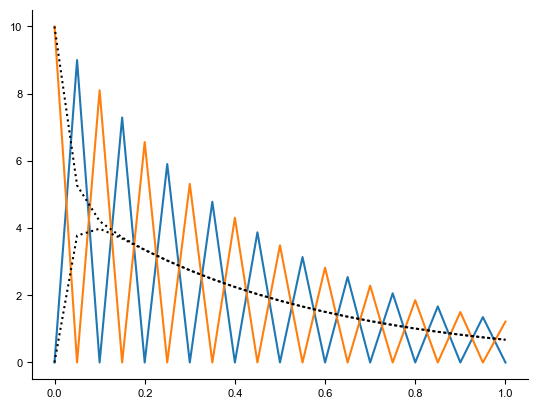

In [11]:
# Analytic solution
from numpy import exp, sqrt

V0_exact = 5*exp(-38*ts)+5*exp(-2*ts)
V1_exact = 5*exp(-2*ts)-5*exp(-38*ts)

# Plot results
import matplotlib.pyplot as plt
plt.plot(ts, Vs)
plt.plot(ts, V0_exact, ':k')
plt.plot(ts, V1_exact, ':k')

### Backward Euler method (implicit Euler)

We expand the Taylor expansion at $t_0+\Delta t$, not at $t_0$,
$$
y(t_0) = y(t_0+\Delta t - \Delta t) = y(t_0+\Delta t) - \frac{dy}{dt}(t_0+\Delta t)\Delta t+ \frac12 \frac{d^2 y}{dt^2}(t_0+\Delta t)\Delta t^2 + \cdots
$$

Then, up to $\mathcal{O}(\Delta t^2)$ error,

$$\Rightarrow y(t_0 + \Delta t) \approx y(t_0) + f(y(t_0+\Delta t), t_0+\Delta t)\Delta t,$$

Then, we can use *a numerical equation solver* to solve this for $y(t_0 + \Delta t)$ for every time step.

#### Predictor-corrector method for numerical solution

In [12]:
from numpy import abs, sum

def predict_correct(f, yprev, dt, error_tolerance=0.1, max_iter=100):
    """predictor-corrector scheme for solving the implicit equation"""
    
    # initial prediction is yprev
    ypredict = yprev # y(t_0)
    
    # Loop for max_iter times
    for i in range(max_iter):
        
        ynext = yprev + f(ypredict)*dt
        
        # test if ycorrect = ypredict
        error = sum(abs(ynext-ypredict))
        if error<error_tolerance:
            # Return the solution and get out of the loop
            return ynext
        else:
            # if the test fails, the prediction is updated
            ypredict = (ynext + ypredict)/2
    
    # if test never succeeds within max_iter repetition, return error
    raise RuntimeError('Failed to solve the implicit equation.')

In [15]:
ts = []
Vs = []

t = 0
Vinit = array([0, 10]) # In the beginning, Neuron 1 is depolarized

ts.append(t)
Vs.append(Vinit)

Nsteps_per_sec = 20
dt = 1/Nsteps_per_sec #dt = 0.05 sec
for i in range(Nsteps_per_sec):
    Vprev = Vs[i]
    
    # Backward Euler
    Vnext = predict_correct(right_hand_side, Vprev, dt)
    
    t = t + dt
    ts.append(t)
    Vs.append(Vnext)
    
ts = array(ts)
Vs = array(Vs)

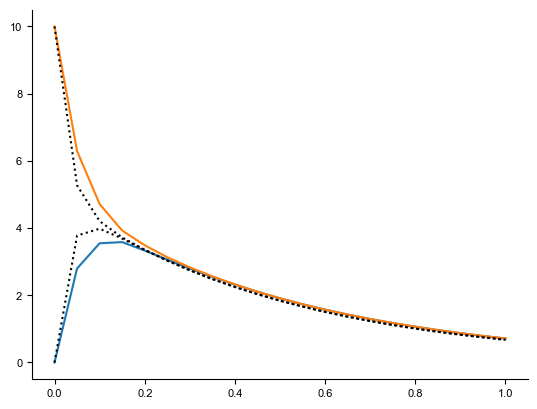

In [16]:
V0_exact = 5*exp(-38*ts)+5*exp(-2*ts)
V1_exact = 5*exp(-2*ts)-5*exp(-38*ts)

plt.plot(ts, array(Vs))
plt.plot(ts, V0_exact, ':k')
plt.plot(ts, V1_exact, ':k')

### Runge-Kutta method (of the second order, RK23)

In this method, we sequentially approximate $k$ in
$$ y(t_0+\Delta t) = y(t_0) + k\Delta t.$$

1. We predict $k \approx k_1 = f(y(t_0), t_0)$ just as the forward Euler.
2. Now we move **a half step** and evaluate a new predictor for $k$
$$ k_2 = f(y(t_0)+k_1\Delta t/2, t_0+\Delta t/2)$$

$$\Rightarrow y(t_0+\Delta) \approx y(t_0) + k_2\Delta t$$

This method is accurate up to an $\mathcal{O}(\Delta t^3)$ error (more accurate than $\mathcal{O}(\Delta t^2)$ errors of Euler methods).

In [20]:
ts = []
Vs = []

t = 0
Vinit = array([0, 10]) # In the beginning, Neuron 1 is depolarized

ts.append(t)
Vs.append(Vinit)

Nsteps_per_sec = 20
dt = 1/Nsteps_per_sec #dt = 0.05 sec
for i in range(Nsteps_per_sec):
    Vprev = Vs[i]
    
    k1 = right_hand_side(Vprev)    
    k2 = right_hand_side(Vprev + k1*dt/2)
    
    Vnext = Vprev + k2*dt
    
    t = t + dt
    ts.append(t)
    Vs.append(Vnext)

ts = array(ts)
Vs = array(Vs)

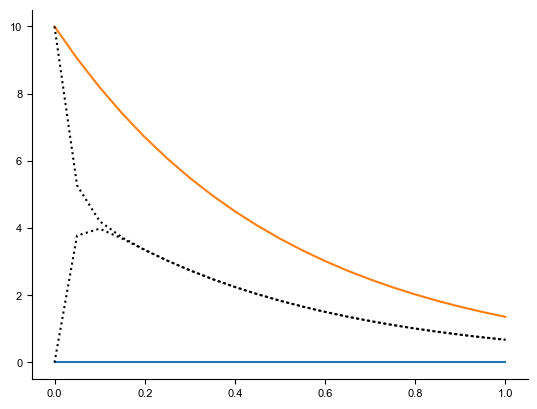

In [21]:
V0_exact = 5*exp(-38*ts)+5*exp(-2*ts)
V1_exact = 5*exp(-2*ts)-5*exp(-38*ts)

plt.plot(ts, array(Vs))
plt.plot(ts, V0_exact, ':k')
plt.plot(ts, V1_exact, ':k')

### Take-home messages
If your model is made of ODEs, please keep in mind:

#### 1. Accuracy matters.

Try different solver algorithms and time step sizes to test the accuracy-speed trade-off.

#### 2. Stability matters.

Keep in mind that the explicit solvers can be unstable regardless of their accuracy (with **stiff equations**). Test smaller time steps to make sure what you see is a model property, not instability arising from a poor choice of a simulation scheme and time step.

*Sometimes it's not obvious that you're dealing with ODEs and these related issues!*

Qin, C. et al. 2020. NeurIPS 2020
<img src=figures/gan1.png width=800>



<img src=figures/gan3.png width=1600>


<img src=figures/gan2.png width=800>

## Fixed points and local behavior

How do we characterize the general properpties of a dynamical system? We can first assume that the system will arrive at a certain "state" at the end of the day. Then, understanding the system's behavior around the state will be important.

1. One way to reach a "state" is that the system stops evolving, i.e., ${dy}/{dt} = f(y) = 0$ at $y=y_0$.
2. Then, we can analyze how the system would behave around $y=y_0$ by taking linear approximation of the full dynamics.

$$
\begin{aligned}
\Rightarrow \frac{dy}{dt} &= f(y),\\
\Rightarrow \frac{dz}{dt} &\approx \frac{df(y_0)}{dy}z, \quad y = y_0 + z, \quad z\ll 1\\
\Rightarrow \frac{dz}{dt} &= M\cdot z, \quad M_{ij} = \frac{df_i(y_0)}{dy_j}
\end{aligned}
$$


| Type | |
|:-----:|:---:|
|Attractors| <img src=figures/attractor.png width=400>|
|Repellors| <img src=figures/repellor.png width=400>|
|Saddle|  <img src=figures/saddle.png width=200>|
|Cycles| <img src=figures/neutral.png width=200>|


### Matrix eigen-decomposition to identify behaviors

We can compute the eigenvalues of $M$ to analyze which behavior would arise around fixed point,

$$
M = U\Lambda U^{-1}, \quad \Lambda = \left(
\begin{array}{cccc}
\lambda_1 & 0 & \cdots & \cdots\\
0 & \lambda_2 & \cdots & \cdots\\
0 & 0 & \cdots &\cdots\\
0 & \cdots & 0 & \lambda_N
\end{array}\right)
$$

Then,
$$
\frac{dz}{dt} = M z \Rightarrow \frac{dx_i}{dt} = \lambda_i x_i,\quad x = U^{-1}z.
$$


$$\frac{dx_i}{dt} = \lambda_i x_i \Rightarrow x_i(t) = C_i e^{\lambda_i t}.$$

| Type | | Eigenvalue property|
|:-----:|:---:|:---:|
|Attractors| <img src=figures/attractor.png width=400>| $\text{Real}[\lambda_i] <0$. Nonzero $\text{Im}[\lambda_i]$ induces rotation.|
|Repellors| <img src=figures/repellor.png width=400>| $\text{Real}[\lambda_i] >0$. Nonzero $\text{Im}[\lambda_i]$ induces rotation.| 
|Saddle|  <img src=figures/saddle.png width=200>|$\text{Real}[\lambda_i] >0$ or $\text{Real}[\lambda_i] <0$ depending on $i$.|
|Cycle| <img src=figures/neutral.png width=200>|$\lambda_i$'s are pure imaginary|


In [38]:
# Eigenvalue decomposition
from numpy.linalg import eig
M = array([[0, 1.2],
           [-0.5, 0]])

lamda, eigvecs = eig(M)
print('Eigenvalues:', lamda)

Eigenvalues: [0.+0.77459667j 0.-0.77459667j]


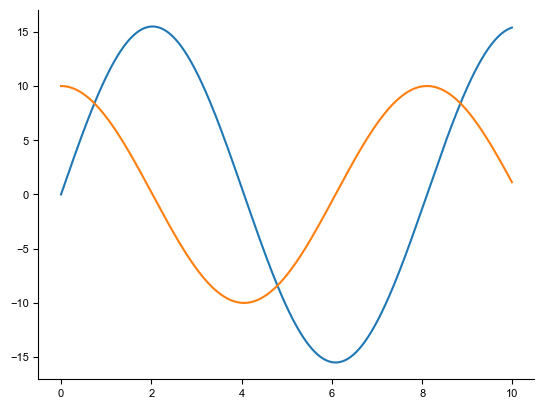

In [39]:
# We use the fourth-order Runge-Kutta method 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp
 
def f(t, z): 
    dz = M @ z # Matrix multiplication
    return dz
 
z0 = array([0, 10])
sol = solve_ivp(f, t_span=[0, 10], t_eval=arange(0, 10, 0.01), y0=z0)

plt.plot(sol.t, sol.y[0]); plt.plot(sol.t, sol.y[1]);

(-20.0, 20.0)

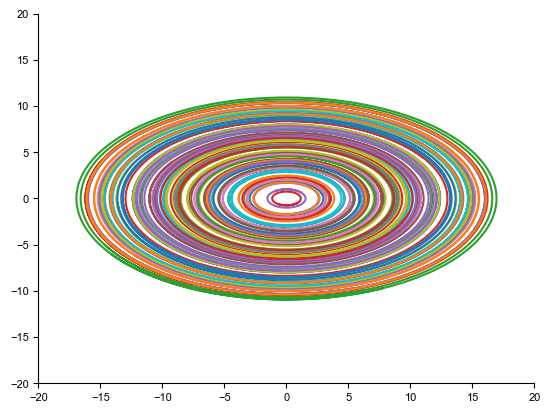

In [40]:
from numpy.random import uniform, normal

z0x = uniform(low=-10, high=10, size=100) 
z0y = uniform(low=-10, high=10, size=100) 

for i in range(z0x.size):
    sol = solve_ivp(f, t_span=[0, 10], t_eval=arange(0, 10, 0.01), y0=[z0x[i], z0y[i]])
    plt.plot(sol.y[0], sol.y[1])

plt.xlim([-20, 20])
plt.ylim([-20, 20])


### Application in large systems

Let's consider a linear dynamical system given by a large (500x500) matrix whose elements are from the standard normal distribution. 

We first compute the eigenvalues of the matrix.

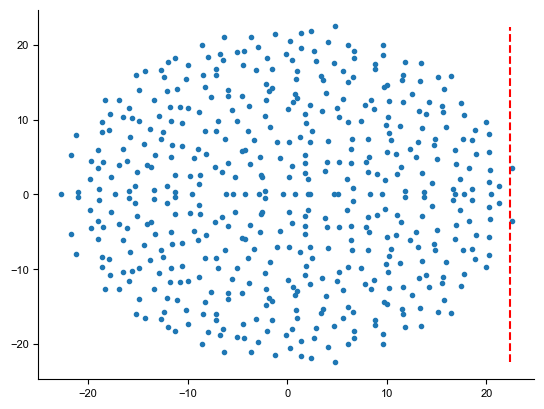

In [48]:
from numpy.random import normal

Nsize = 500
M = normal(size=(Nsize, Nsize)) # Nsize x Nsize matrix filled by Gaussian random numbers
lamda, eigvecs = eig(M)

plt.plot(lamda.real, lamda.imag, '.') 
plt.plot(array([1, 1])*sqrt(Nsize), array([-1, 1])*sqrt(Nsize), '--r')

What does it tell us about the system's behavior given by ${dz}/{dt} = Mz$?

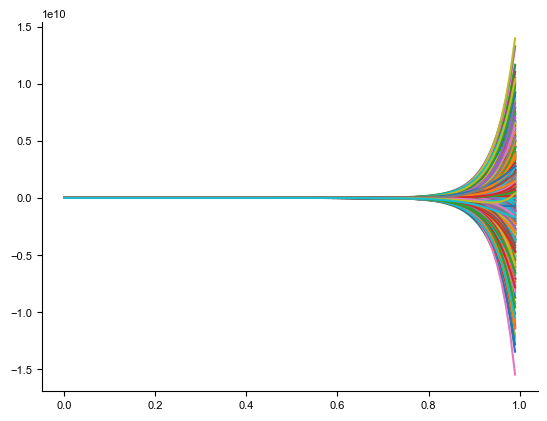

In [43]:
def f(t, z):
    dz = M @ z # Matrix multiplication
    return dz 

z0 = uniform(low=-10, high=10, size=Nsize)
sol = solve_ivp(f, t_span=[0, 1], t_eval=arange(0, 1, 0.01), y0=z0)

_ = plt.plot(sol.t, sol.y.T)

We can shift the distribution adding an identity matrix.

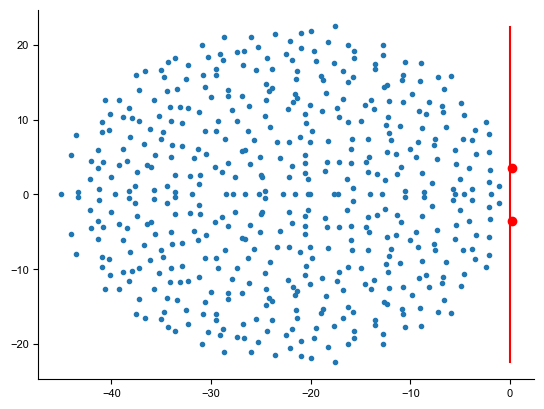

In [49]:
# eye(N) generates an N x N identity matrix.
from numpy import eye 

lamda, eigvecs = eig(M - sqrt(Nsize)*eye(Nsize))

plt.plot(lamda.real, lamda.imag, '.')
plt.plot(lamda.real[lamda.real>0], lamda.imag[ lamda.real>0], 'or')
plt.plot(array([0, 0])*sqrt(Nsize), array([-1, 1])*sqrt(Nsize), 'r')

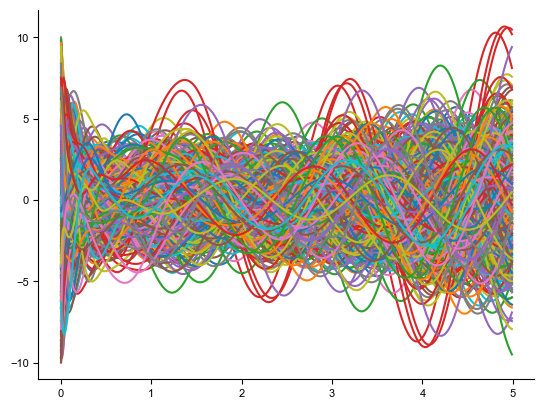

In [54]:
def f(t, z):
    dz = (M - sqrt(Nsize)*eye(Nsize)) @ z # Matrix multiplication
    return dz

z0 = uniform(low=-10, high=10, size=Nsize)
sol = solve_ivp(f, t_span=[0, 5], t_eval=arange(0, 5, 0.01), y0=z0)

plt.plot(sol.t, sol.y.T);